In [6]:
# !pip install numpy==1.24.4

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# df = pd.read_csv('/content/drive/MyDrive/Fyp/combined_emotion.csv')

In [10]:
df = pd.read_csv('data/combined_emotion.csv')

In [11]:
df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


In [12]:
df.shape

(422746, 2)

In [13]:
df.columns

Index(['sentence', 'emotion'], dtype='object')

In [14]:
df['emotion'].unique()

array(['fear', 'sad', 'love', 'joy', 'suprise', 'anger'], dtype=object)

In [15]:
df['emotion'] = df['emotion'].replace('suprise', 'surprise')
emots = df['emotion'].unique()
print('Emotions in the Dataset:\n')
for e in emots:
  print(e)

Emotions in the Dataset:

fear
sad
love
joy
surprise
anger


In [16]:
df.isnull().sum()

,0
sentence,0
emotion,0


In [17]:
df = df.dropna()
df.count()

,0
sentence,422746
emotion,422746


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422746 entries, 0 to 422745
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  422746 non-null  object
 1   emotion   422746 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB


In [19]:
df.describe()

,sentence,emotion
count,422746,422746
unique,393822,6
top,i feel more adventurous willing to take risks ...,joy
freq,16,143067


In [20]:
# total aur duplicate rows count karenge

total_rows = len(df)
duplicate_rows = df.duplicated().sum()

print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {duplicate_rows}")

df[df.duplicated()].head()

Total rows: 422746
Duplicate rows: 6623


,sentence,emotion
8397,i told my staff i said you know i feel invigor...,joy
15187,i feel fine,joy
15638,i feel bob loblaw is a handsome professional m...,joy
19413,i feel tortured var fb comment action link hre...,anger
23711,i also have no particular feeling of patriotis...,love


In [21]:
# Sentence ke hisaab se group banaige aur unique emotions dhundenge
grouped = df.groupby('sentence')['emotion'].unique()

# un sentences ko filter krenge jinke multiple emotion label hain
duplicates_with_multiple_emotions = grouped[grouped.apply(len) > 1]

print("Sample of duplicate sentences with multiple emotion labels:")
for sentence, emotions in duplicates_with_multiple_emotions.sample(10, random_state=42).items():
    print(f"Sentence: {sentence}")
    print(f"Emotions: {emotions}")
    print("-" * 30)

Sample of duplicate sentences with multiple emotion labels:
Sentence: i feel so beyond blessed
Emotions: ['joy' 'love']
------------------------------
Sentence: i feel i should share these amazing futuristic fashion photograph
Emotions: ['joy' 'surprise']
------------------------------
Sentence: i go to the church service not youth i feel like im hated and i know im not the only one
Emotions: ['sad' 'anger']
------------------------------
Sentence: i feel supporting walker and giving him his space
Emotions: ['joy' 'love']
------------------------------
Sentence: i feel no matter how helpless and removed i am i will never let them know the depths of my sadness
Emotions: ['sad' 'fear']
------------------------------
Sentence: i feel you here and you re picking up the pieces forever faithful sara groves
Emotions: ['joy' 'love']
------------------------------
Sentence: i am first being treated like a normal human being and valued as one by my country i could not really feel like esm goh th

In [22]:
print(df['emotion'].value_counts())

emotion
joy         143067
sad         121187
anger        59317
fear         49649
love         34554
surprise     14972
Name: count, dtype: int64


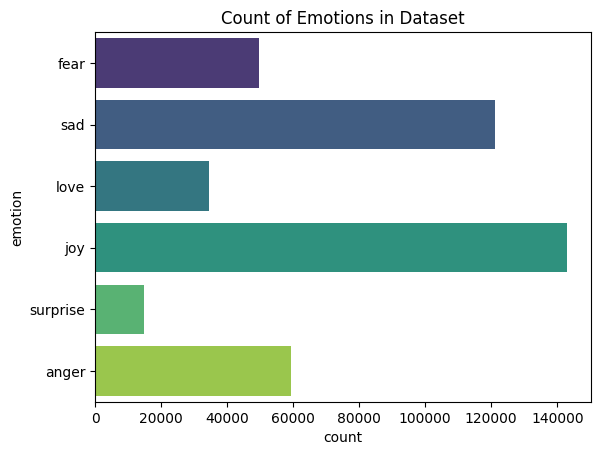

In [23]:
# idr plot krenge dataset mein har emotion kitni baar aik sentence ko label kiya gaya hai wo show krega

sns.countplot(y='emotion', data=df, palette='viridis', hue='emotion')
plt.title('Count of Emotions in Dataset')
plt.show()

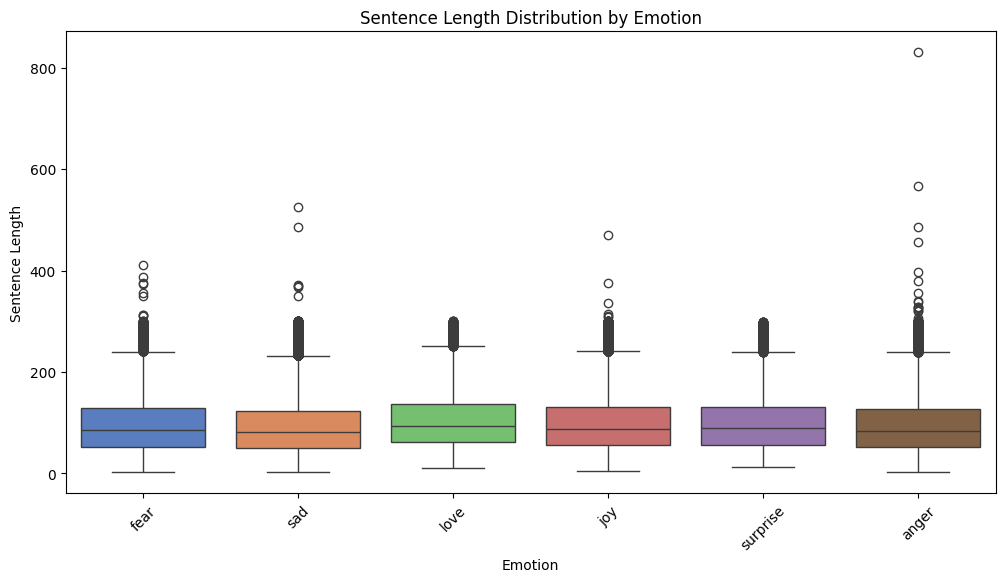

In [24]:
# idr plot krenge sentence length distribution har emotion k liye

df['sentence_length'] = df['sentence'].apply(len)
plt.figure(figsize=(12,6))
sns.boxplot(x='emotion', y='sentence_length', data=df, hue='emotion', palette='muted')
plt.title('Sentence Length Distribution by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Sentence Length')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1939838153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='coolwarm')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'joy'),
  Text(1, 0, 'sad'),
  Text(2, 0, 'anger'),
  Text(3, 0, 'fear'),
  Text(4, 0, 'love'),
  Text(5, 0, 'surprise')])

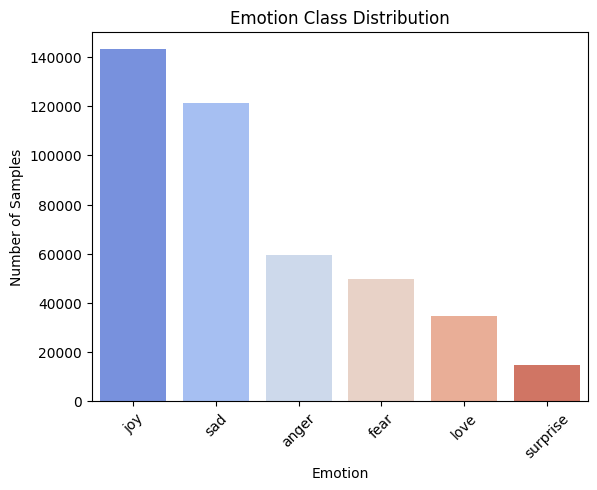

In [25]:
# basically ye plot krta hai emtion class or unki distribution descending order me

sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='coolwarm')
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)

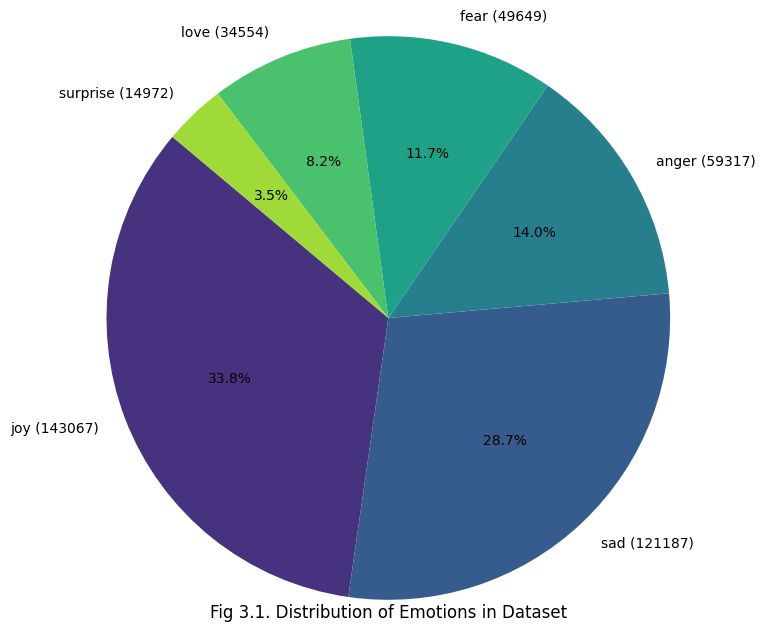

In [26]:
# piechart plot krenge jo dataset mein emotions ki distribution unki percentage share dataset me show krega

emotion_counts = df['emotion'].value_counts()

plt.figure(figsize=(8, 8))

labels = [f'{label} ({count})' for label, count in emotion_counts.items()]

plt.pie(emotion_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(emotion_counts)))
plt.title('Fig 3.1. Distribution of Emotions in Dataset', y=-0)
plt.axis('equal')
plt.show()

In [27]:
df['sentence_length'] = df['sentence'].apply(lambda x: len(x.split()))
display(df['sentence_length'].describe())

,sentence_length
count,422746.000000
mean,19.211612
std,11.051310
min,1.000000
25%,11.000000
50%,17.000000
75%,25.000000
max,178.000000


Text(0.5, 0, 'Number of Words')

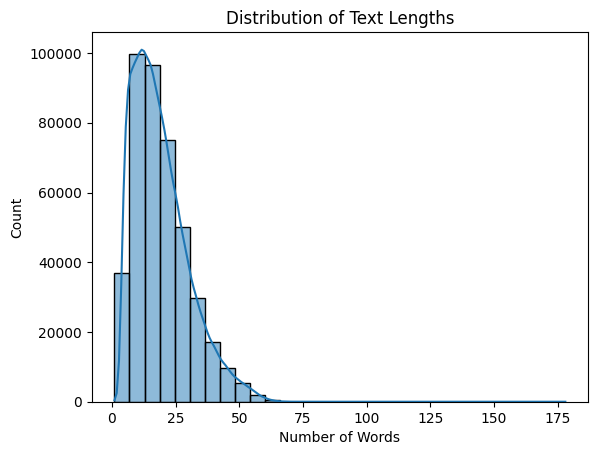

In [28]:
# sentence length distribution ko plot krenge histogram ka use kr k

sns.histplot(df['sentence_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")

In [29]:
# statistics se pta lgne k bd column name change krdiya q k "text" ziada behtr name hai general hai

df.rename(columns={'sentence': 'text'}, inplace=True)
df.rename(columns={'sentence_length': 'text_length'}, inplace=True)
display(df.head())

,text,emotion,text_length
0,i just feel really helpless and heavy hearted,fear,8
1,ive enjoyed being able to slouch about relax a...,sad,45
2,i gave up my internship with the dmrg and am f...,fear,12
3,i dont know i feel so lost,sad,7
4,i am a kindergarten teacher and i am thoroughl...,fear,42


/tmp/ipython-input-2698941030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y='text_length', data=df, palette='Set3')


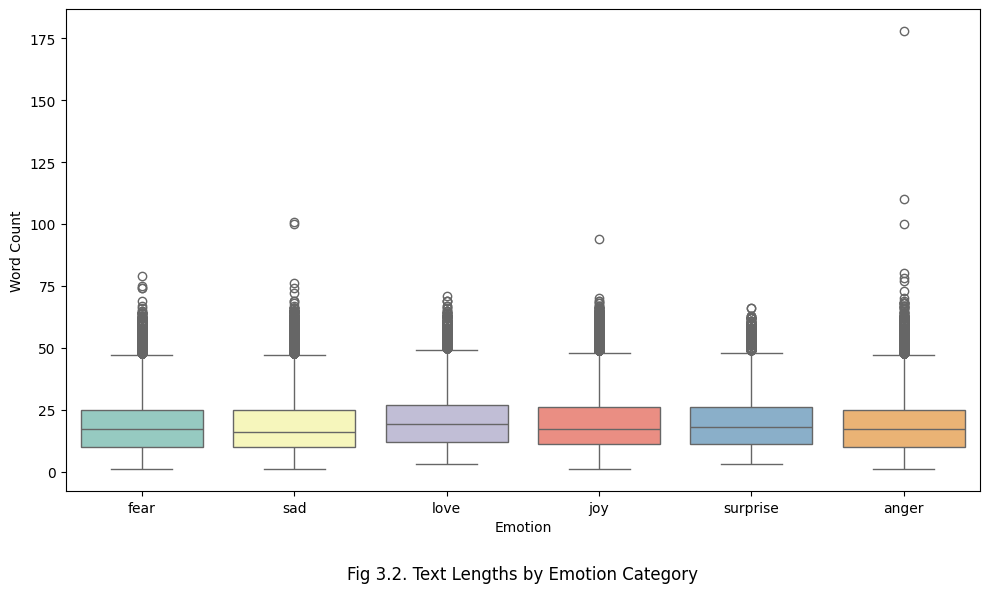

In [30]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='emotion', y='text_length', data=df, palette='Set3')
plt.title('Fig 3.2. Text Lengths by Emotion Category', y=-.2)
plt.xlabel('Emotion')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


In [31]:
import re
import string

def clean_text(text):
  """
  text clean krenge

  args: text, text jo clean krna hai

  return: cleaned text return krega string form me

  """
  text = text.lower()  # lower me convert krenge
  text = re.sub(r'https?://\S+|www\.\S+', '', text)  # url remove krenge
  text = re.sub(r'<.*?>', '', text) # html tags remove krenge
  text = re.sub(r'\d+', '', text) # numbers remove krenge
  text = text.translate(str.maketrans('', '', string.punctuation)) # punctuation remove krenge
  text = re.sub(r'\s+', ' ', text).strip() # whitespace remove krenge

  return text


# function ko test krenge
test_text = "<b> ATTENTION! <b> new eid gift arrived click on the link www.eid.com or call 03231234567 to claim your gift now. "
print(f'original: {test_text}')
print(f'cleaned: {clean_text(test_text)}')

from tqdm import tqdm
tqdm.pandas()

df['cleaned_text'] = df['text'].progress_apply(clean_text)

# cleaning ko verify krenge 10 entries k sample display kr k unke original or cleaned sentence k st
print('\n\n original and cleaned text\n')
for i in range(10):
  print(f"original: {df['text'].iloc[i]}")
  print(f"cleaned: {df['cleaned_text'].iloc[i]}")
  print()


original: <b> ATTENTION! <b> new eid gift arrived click on the link www.eid.com or call 03231234567 to claim your gift now. 
cleaned: attention new eid gift arrived click on the link or call to claim your gift now


100%|██████████| 422746/422746 [00:08<00:00, 52412.73it/s]



 original and cleaned text

original: i just feel really helpless and heavy hearted
cleaned: i just feel really helpless and heavy hearted

original: ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing
cleaned: ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing

original: i gave up my internship with the dmrg and am feeling distraught
cleaned: i gave up my internship with the dmrg and am feeling distraught

original: i dont know i feel so lost
cleaned: i dont know i feel so lost

original: i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety 

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def tokenizer_stopwordremover(text):
  '''
  text ko tokenize kr k stopwords remove krenge

  args: text, text jisko tokenize krenge

  returns: tokens ki list jismese stopwords remove kiye hain
  '''

  custom_stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor', 'but', 'however', 'although', 'though'} # un words ko exclude krdenge apne stop words removal process me se jo emotion detection me important hoskte hain

  tokens = word_tokenize(text) # text ko tokenize krenge
  filtered_tokens = [word for word in tokens if word not in custom_stop_words]

  return filtered_tokens


# function test krenge
test_cleanedtext = '\ni am a very authentic person who does not need validation'
tokens = tokenizer_stopwordremover(test_cleanedtext)
print(f'original: {test_cleanedtext}')
print(f'tokens without stopwords: {tokens}')

from tqdm import tqdm
tqdm.pandas()

df['tokens'] = df['cleaned_text'].progress_apply(tokenizer_stopwordremover) #new tokens column ko create krenge

# new column ko verify krenge
print('cleaned and tokens')
for i in range(10):
  print(f"cleaned: {df['cleaned_text'].iloc[i]}")
  print(f"tokens: {df['tokens'].iloc[i]}")
  print()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


original: 
i am a very authentic person who does not need validation
tokens without stopwords: ['authentic', 'person', 'not', 'need', 'validation']


100%|██████████| 422746/422746 [01:36<00:00, 4383.21it/s]

cleaned and tokens
cleaned: i just feel really helpless and heavy hearted
tokens: ['feel', 'really', 'helpless', 'heavy', 'hearted']

cleaned: ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing
tokens: ['ive', 'enjoyed', 'able', 'slouch', 'relax', 'unwind', 'frankly', 'needed', 'last', 'weeks', 'around', 'end', 'uni', 'expo', 'lately', 'started', 'find', 'feeling', 'bit', 'listless', 'never', 'really', 'good', 'thing']

cleaned: i gave up my internship with the dmrg and am feeling distraught
tokens: ['gave', 'internship', 'dmrg', 'feeling', 'distraught']

cleaned: i dont know i feel so lost
tokens: ['dont', 'know', 'feel', 'lost']

cleaned: i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to 

In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

Lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(nltk_tag):
  '''
  lemmatization accuracy improve krne k liye
  nltk pos tags ko wordnet pos tags se map krenge
  '''
  if nltk_tag.startswith('J'):
        return wordnet.ADJ
  elif nltk_tag.startswith('V'):
        return wordnet.VERB
  elif nltk_tag.startswith('N'):
        return wordnet.NOUN
  elif nltk_tag.startswith('R'):
        return wordnet.ADV
  else:
        return wordnet.NOUN


def lemmatize_tokens(tokens):
  '''
  tokens ko lemmatize kr k lemmatized tokens ki list return krenge

  args: tokens, tokens ki list

  returns: lemmatized tokens ki list
  '''

  pos_tags = nltk.pos_tag(tokens)
  Lemmatized_tokens = [Lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

  return Lemmatized_tokens

# function test krenge
test_tokens = ['loving', 'loved', 'loves', 'running', 'ran', 'better', 'best', 'was', 'is']
lemmatizedtt = lemmatize_tokens(test_tokens)
print(f"test tokens: {test_tokens}")
print(f"lemmatized test tokens: {lemmatizedtt}")

from tqdm import tqdm
tqdm.pandas()

df['lemmatized_tokens'] = df['tokens'].progress_apply(lemmatize_tokens)

# lemmatization ko verify krenge
print("\n\ntokens and lemmatized tokens\n")
for i in range(10):
    print(f"original tokens: {df['tokens'].iloc[i]}")
    print(f"lemmatized tokens: {df['lemmatized_tokens'].iloc[i]}")
    print()

df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


test tokens: ['loving', 'loved', 'loves', 'running', 'ran', 'better', 'best', 'was', 'is']
lemmatized test tokens: ['love', 'loved', 'love', 'run', 'run', 'good', 'best', 'be', 'be']


100%|██████████| 422746/422746 [04:22<00:00, 1612.25it/s]




tokens and lemmatized tokens

original tokens: ['feel', 'really', 'helpless', 'heavy', 'hearted']
lemmatized tokens: ['feel', 'really', 'helpless', 'heavy', 'hearted']

original tokens: ['ive', 'enjoyed', 'able', 'slouch', 'relax', 'unwind', 'frankly', 'needed', 'last', 'weeks', 'around', 'end', 'uni', 'expo', 'lately', 'started', 'find', 'feeling', 'bit', 'listless', 'never', 'really', 'good', 'thing']
lemmatized tokens: ['ive', 'enjoy', 'able', 'slouch', 'relax', 'unwind', 'frankly', 'need', 'last', 'week', 'around', 'end', 'uni', 'expo', 'lately', 'start', 'find', 'feeling', 'bit', 'listless', 'never', 'really', 'good', 'thing']

original tokens: ['gave', 'internship', 'dmrg', 'feeling', 'distraught']
lemmatized tokens: ['give', 'internship', 'dmrg', 'feeling', 'distraught']

original tokens: ['dont', 'know', 'feel', 'lost']
lemmatized tokens: ['dont', 'know', 'feel', 'lose']

original tokens: ['kindergarten', 'teacher', 'thoroughly', 'weary', 'job', 'taken', 'university', 'entran

In [34]:
# text data ko TF-IDF vectorizer ka use kr k numerical features me convert krenge

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 1))

X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"Vocabulary size: {len(feature_names)}")
print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Sparsity: {100.0 * (1.0 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1]))}%")

print("\nSample vocabulary terms:")
print(feature_names[:20])


sample_size = min(5, X_tfidf.shape[0])
sample_indices = np.random.choice(X_tfidf.shape[0], sample_size, replace=False)

sample_df = pd.DataFrame(X_tfidf[sample_indices].toarray(), columns=feature_names)

print("\nSample TF-IDF values (non-zero features only):")
for idx, row in enumerate(sample_indices):
    print(f"\nDocument {idx+1} (original text): {df['text'].iloc[row]}")
    print(f"Lemmatized text: {df['lemmatized_text'].iloc[row]}")

    non_zero = sample_df.iloc[idx][sample_df.iloc[idx] > 0]
    print(f"Top 10 TF-IDF terms: {non_zero.sort_values(ascending=False).head(10)}")

Vocabulary size: 5000
TF-IDF matrix shape: (422746, 5000)
Sparsity: 99.84438324667767%

Sample vocabulary terms:
['abandon' 'ability' 'abit' 'able' 'abortion' 'abroad' 'absence'
 'absolute' 'absolutely' 'absorb' 'absurd' 'abt' 'abuse' 'abused'
 'abusive' 'academic' 'accent' 'accept' 'acceptable' 'acceptance']

Sample TF-IDF values (non-zero features only):

Document 1 (original text): i feel scared at not that i have to work i been working since i was or what i am going to do i that taking see what comes as it happens approach is best for me so i am not scared of that either
Lemmatized text: feel scar not work work since go take see come happen approach best not scar either
Top 10 TF-IDF terms: scar        0.533085
work        0.388784
approach    0.317415
either      0.273968
not         0.270148
best        0.255296
happen      0.239337
since       0.234832
take        0.195316
come        0.194474
Name: 0, dtype: float64

Document 2 (original text): im still feeling guilty about his

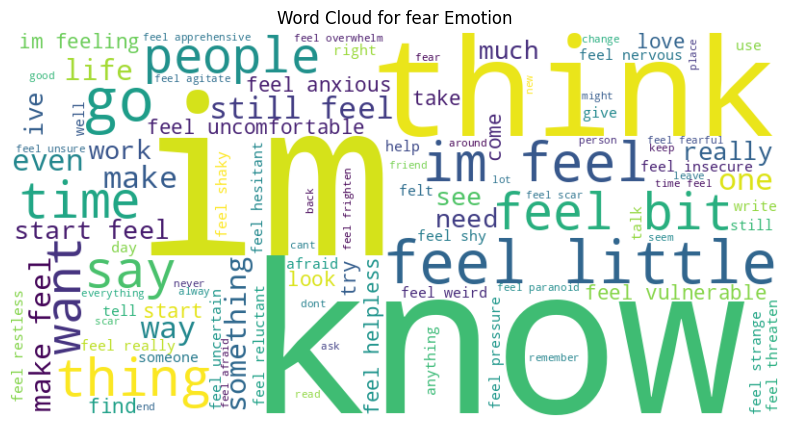

In [35]:
# word cloud generate krenge jo dataset mein fear emotion k liye most frequent words dikhaye ga

from wordcloud import WordCloud

first_emotion = df['emotion'].unique()[0]

first_emotion_df = df[df['emotion'] == first_emotion]

text_for_wordcloud = " ".join(first_emotion_df['lemmatized_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {first_emotion} Emotion')
plt.show()

/tmp/ipython-input-4244188787.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], palette='tab10')


Text(0.5, 1.0, 't-SNE Visualization of TF-IDF Feature Space')

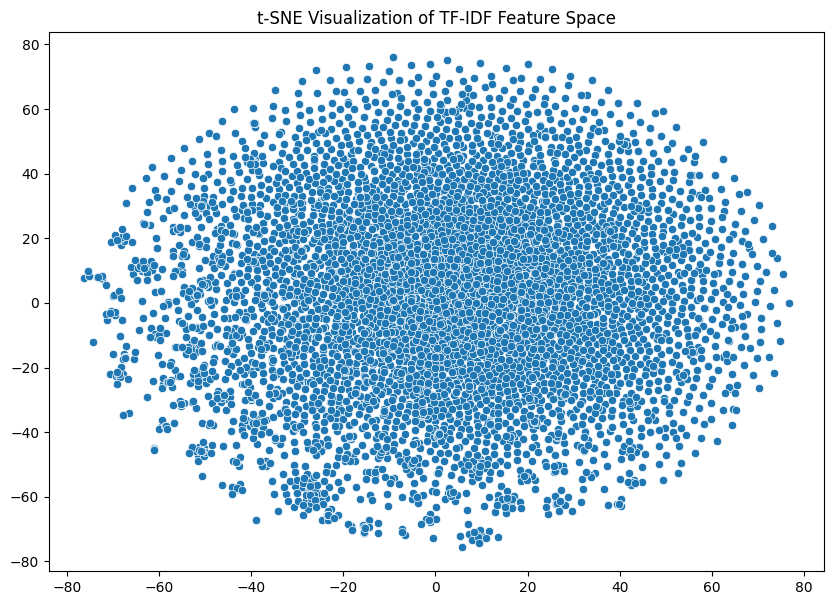

In [36]:
from sklearn.manifold import TSNE

X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_tfidf.toarray()[:5000])
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], palette='tab10')
plt.title("t-SNE Visualization of TF-IDF Feature Space")

In [37]:
from collections import Counter
word_counts = Counter(" ".join(df['lemmatized_text']).split())
display(pd.DataFrame(word_counts.most_common(10), columns=["Word", "Frequency"]))

,Word,Frequency
0,feel,395791
1,like,77219
2,im,62605
3,but,59433
4,feeling,51580
5,not,50583
6,get,33557
7,make,29992
8,go,28831
9,know,27989


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = X_tfidf
y = df['emotion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True) * 100)

Training set shape: (338196, 5000)
Testing set shape: (84550, 5000)

Class distribution in training set:
emotion
joy         33.842210
sad         28.666513
anger       14.031508
fear        11.744373
love         8.173663
surprise     3.541733
Name: proportion, dtype: float64

Class distribution in testing set:
emotion
joy         33.842697
sad         28.667061
anger       14.030751
fear        11.744530
love         8.173862
surprise     3.541100
Name: proportion, dtype: float64


In [39]:
# data imbalance handle krenge SMOTE technique ka use kr k

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

print("Original training set size:", x_train.shape)
print("Balanced training set size:", x_train_bal.shape)

Original training set size: (338196, 5000)
Balanced training set size: (686718, 5000)


In [40]:
print("\nClass distribution in training set(SMOTE applied):")
print(y_train_bal.value_counts(normalize=True) * 100)


Class distribution in training set(SMOTE applied):
emotion
sad         16.666667
fear        16.666667
joy         16.666667
anger       16.666667
love        16.666667
surprise    16.666667
Name: proportion, dtype: float64


In [41]:
# Logistic Regression model ko train krenge
lr_model = LogisticRegression(
    max_iter=1000,
    C=1.0,
    class_weight='balanced',
    solver='liblinear',
    multi_class='ovr')

print("\nTraining the model...")
lr_model.fit(x_train_bal, y_train_bal)


Training the model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   solver='liblinear')

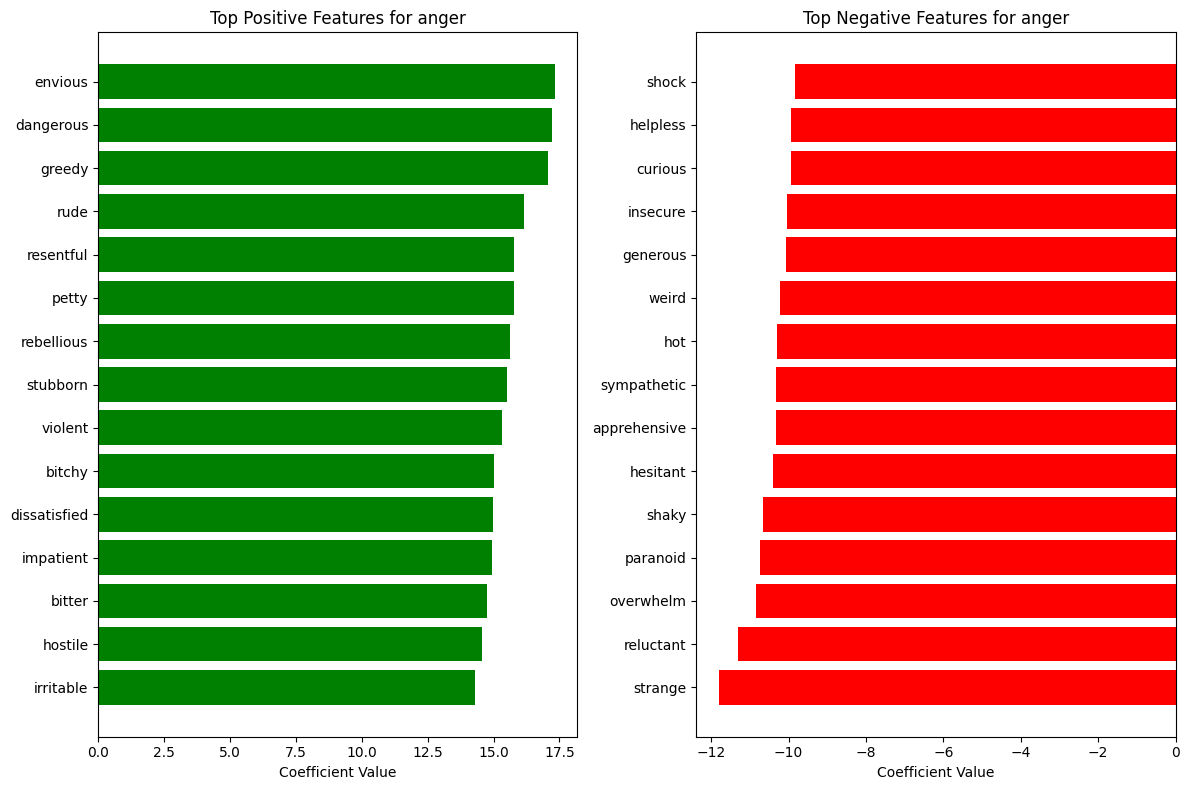

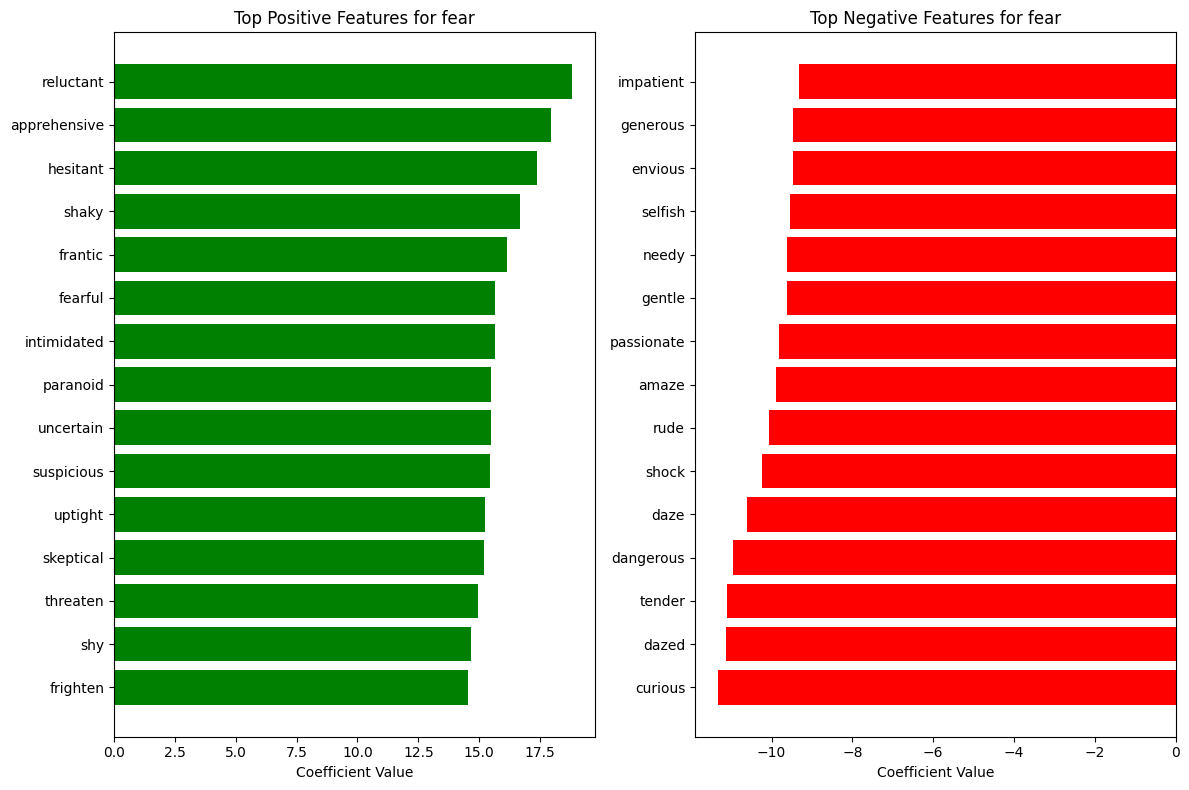

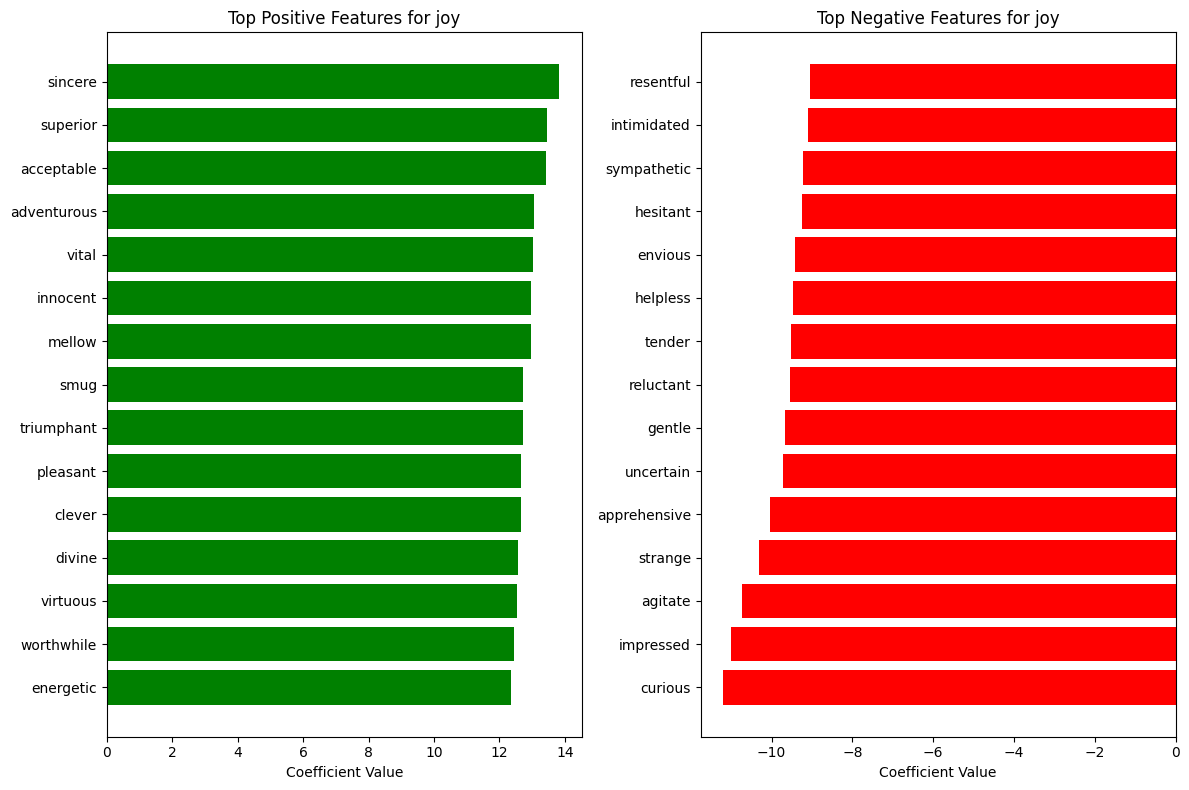

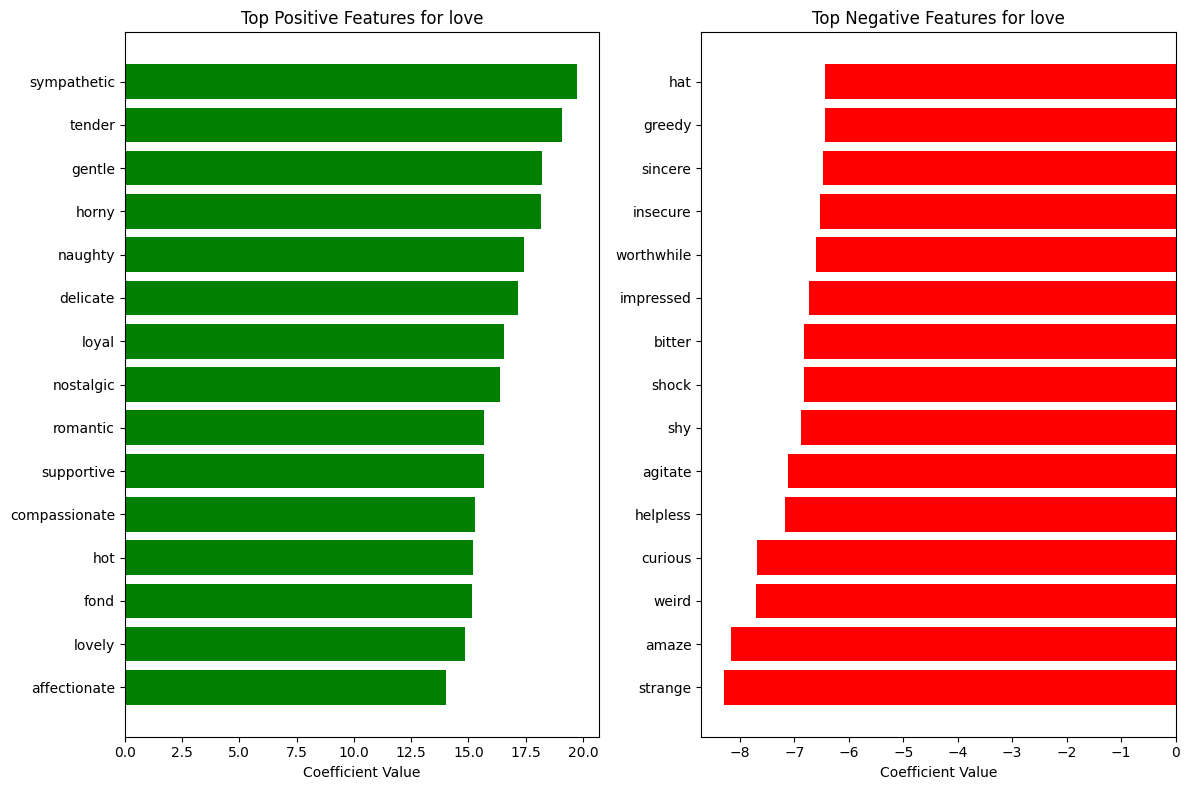

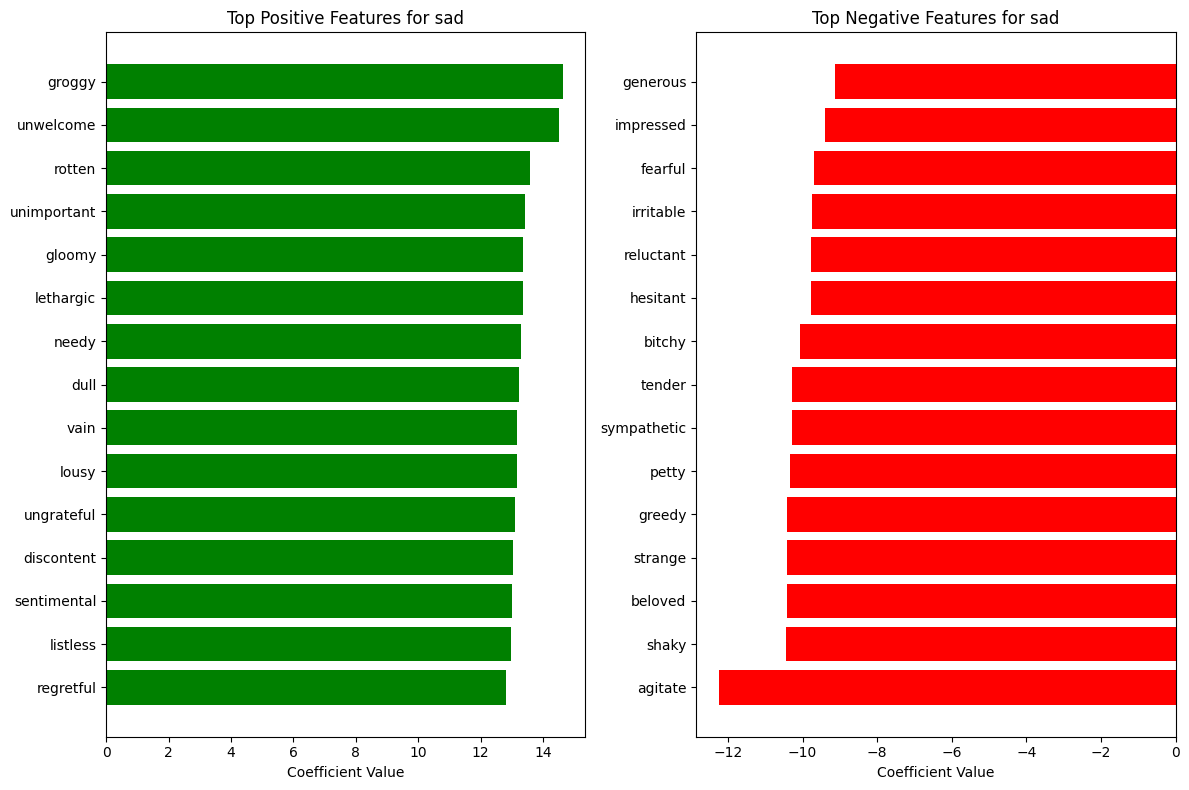

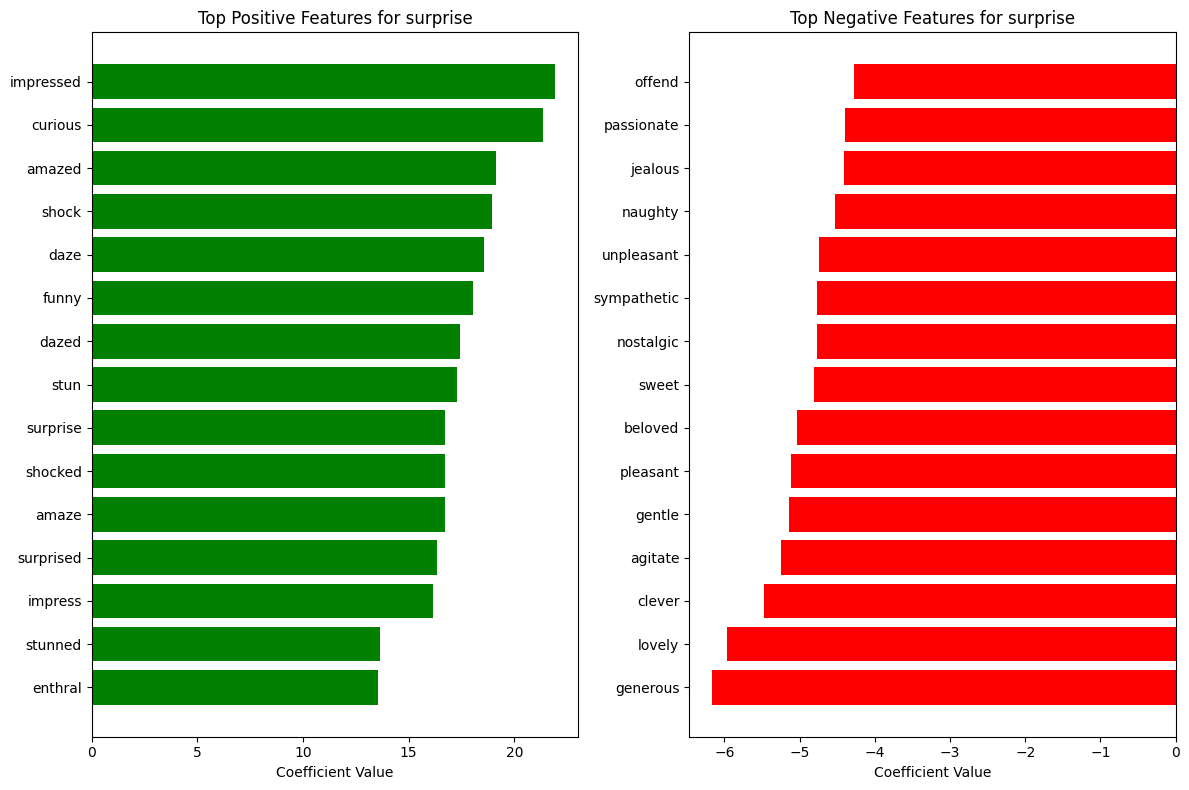

In [42]:
# analyze feature importance for each emotion
def plot_top_features(model, feature_names, class_labels, top_n=15):
    # Get feature coefficients
    coef = model.coef_

    # For each class
    for i, class_label in enumerate(class_labels):
        # Get feature coefficients for this class
        class_coef = coef[i]

        # Get indices of top positive and negative coefficients
        top_positive_idx = np.argsort(class_coef)[-top_n:]
        top_negative_idx = np.argsort(class_coef)[:top_n]

        # Get top feature names and their coefficients
        top_positive_features = [(feature_names[j], class_coef[j]) for j in top_positive_idx]
        top_negative_features = [(feature_names[j], class_coef[j]) for j in top_negative_idx]

        # Plot
        plt.figure(figsize=(12, 8))

        # Plot positive features
        plt.subplot(1, 2, 1)
        y_pos = np.arange(len(top_positive_features))
        plt.barh(y_pos, [val for _, val in top_positive_features], color='green')
        plt.yticks(y_pos, [name for name, _ in top_positive_features])
        plt.title(f'Top Positive Features for {class_label}')
        plt.xlabel('Coefficient Value')

        # Plot negative features
        plt.subplot(1, 2, 2)
        y_pos = np.arange(len(top_negative_features))
        plt.barh(y_pos, [val for _, val in top_negative_features], color='red')
        plt.yticks(y_pos, [name for name, _ in top_negative_features])
        plt.title(f'Top Negative Features for {class_label}')
        plt.xlabel('Coefficient Value')

        plt.tight_layout()
        plt.show()

# Plot top features for each emotion
plot_top_features(lr_model, feature_names, lr_model.classes_)

In [43]:
# trained model ko use kr k predict krenge
y_pred_lr = lr_model.predict(x_test)

print("\nModel Evaluation:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix (LR):")
print(cm_lr)


Model Evaluation:
              precision    recall  f1-score   support

       anger       0.88      0.91      0.90     11863
        fear       0.85      0.85      0.85      9930
         joy       0.95      0.88      0.92     28614
        love       0.72      0.89      0.80      6911
         sad       0.95      0.91      0.93     24238
    surprise       0.67      0.92      0.77      2994

    accuracy                           0.89     84550
   macro avg       0.84      0.89      0.86     84550
weighted avg       0.90      0.89      0.89     84550


Confusion Matrix (LR):
[[10770   476   161    96   309    51]
 [  262  8451   156    60   250   751]
 [  297   244 25300  1989   411   373]
 [   52    34   468  6177   136    44]
 [  792   621   448   239 21978   160]
 [   17   107    54    22    31  2763]]


/tmp/ipython-input-4087153341.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=f1_lr, palette='viridis')


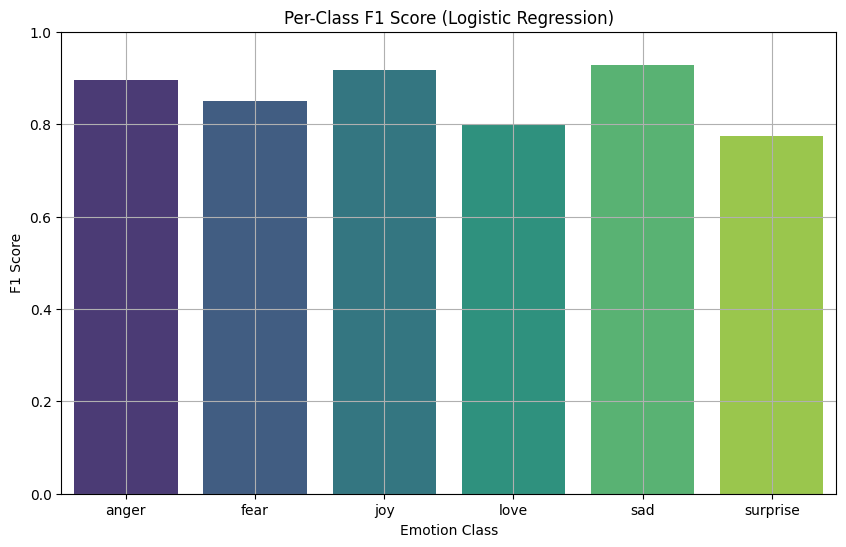

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# classification report ko as dictionary extract krenge
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
classes = list(lr_report.keys())[:-3]

# F1 scores nikalenge
f1_lr = [lr_report[cls]['f1-score'] for cls in classes]

plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=f1_lr, palette='viridis')
plt.title('Per-Class F1 Score (Logistic Regression)')
plt.ylabel('F1 Score')
plt.xlabel('Emotion Class')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

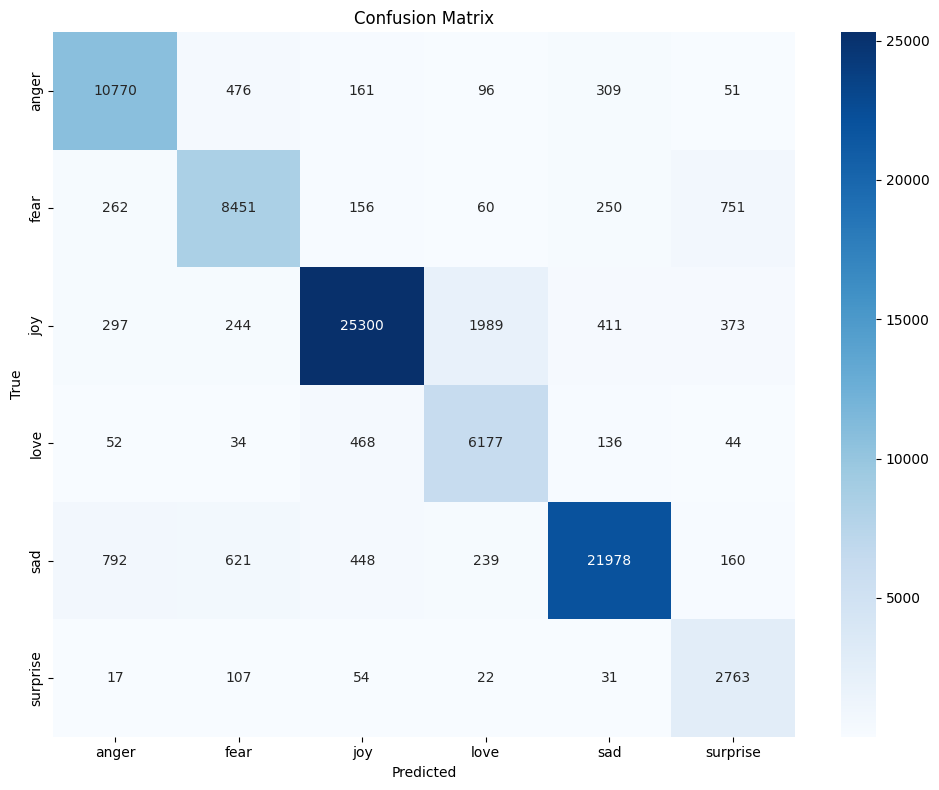

In [45]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=lr_model.classes_,
    yticklabels=lr_model.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [46]:
# Identify misclassified rows
misclassified_indices = y_test[y_pred_lr != y_test].index

# Get true vs predicted
true_lr = y_test.loc[misclassified_indices]
pred_lr = y_pred_lr[y_pred_lr != y_test]

# Assemble into DataFrame
misclassified_df_lr = pd.DataFrame({
    'Text': df.loc[misclassified_indices, 'text'],
    'True Label': true_lr.values,
    'Predicted Label': pred_lr
})

# Display sample of errors
display(misclassified_df_lr.sample(10, random_state=42))

,Text,True Label,Predicted Label
96952,i wait until i have a topic that i feel passio...,joy,love
312680,i was feeling very stressed and anxious,anger,fear
32926,i am so happy amp i feel so blessed,joy,love
77344,im feeling overwhelmed or frazzled or just nee...,fear,surprise
145826,i feel like being generous and recognizing the...,joy,love
103945,i feel that although it may not be the most fa...,joy,love
225821,i want to write about everything because i wan...,anger,sad
355265,when my father was ill,sad,anger
259596,i love the feeling of aching oh what are those...,sad,joy
205500,i was it always felt good to feel that they li...,love,joy


In [47]:
from sklearn.preprocessing import label_binarize

# y_test ko binarize krenge one-vs-rest format me
emotion_classes = lr_model.classes_
y_test_bin = label_binarize(y_test, classes=emotion_classes)
n_classes = y_test_bin.shape[1]

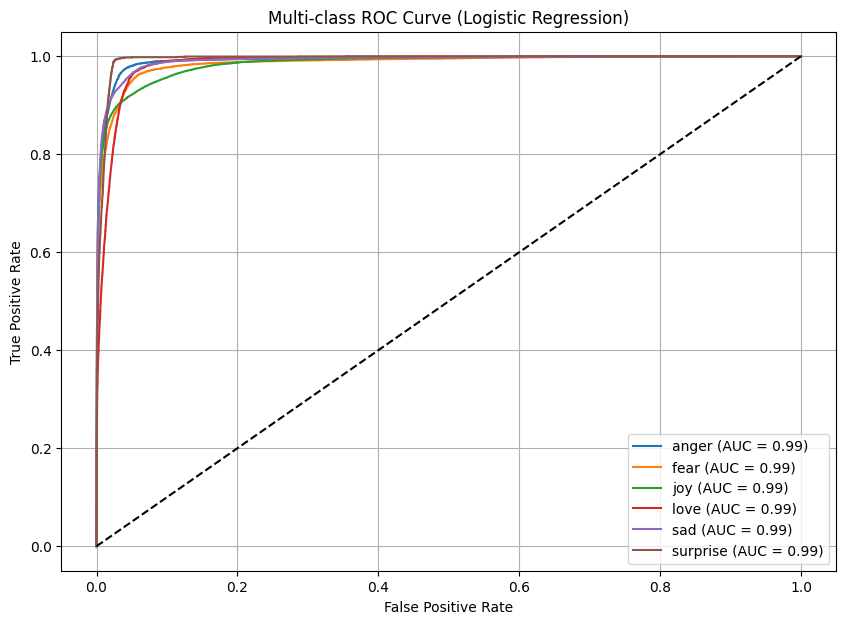

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_score_lr = lr_model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{emotion_classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multi-class ROC Curve (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

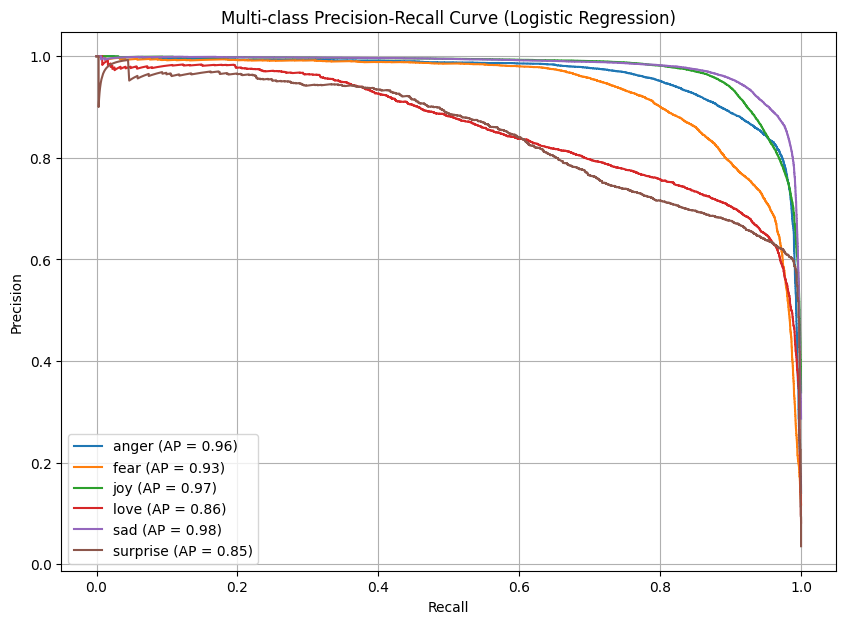

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_lr[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score_lr[:, i])
    plt.plot(recall, precision, label=f"{emotion_classes[i]} (AP = {ap:.2f})")

plt.title("Multi-class Precision-Recall Curve (Logistic Regression)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [50]:
# new text k saat model ko test krenge
def predict_emotion(text, model, vectorizer):

    # text ko preprocess krenge
    cleaned_text = clean_text(text)
    tokens = tokenizer_stopwordremover(cleaned_text)
    lemmatized_tokens = lemmatize_tokens(tokens)
    lemmatized_text = ' '.join(lemmatized_tokens)

    # Vectorize
    X_new = vectorizer.transform([lemmatized_text])

    # Predict
    prediction = model.predict(X_new)[0]

    probabilities = model.predict_proba(X_new)[0]
    prob_dict = {emotion: prob for emotion, prob in zip(model.classes_, probabilities)}

    return prediction, prob_dict

In [51]:
example_text = [
    "I am so happy today!",
    "I feel really sad and depressed",
    "That movie was terrifying",
    "I love spending time with my family",
    "I'm so angry I could scream",
    "Wow, I didn't expect that at all!"]

print("\nTesting with example text:")
for text in example_text:
    prediction, probabilities = predict_emotion(text, lr_model, tfidf_vectorizer)
    print(f"\ntext: {text}")
    print(f"Predicted emotion: {prediction}")
    print("Probabilities:")
    for emotion, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
        print(f"  {emotion}: {prob:.4f}")


Testing with example text:

text: I am so happy today!
Predicted emotion: joy
Probabilities:
  joy: 0.8878
  anger: 0.0433
  fear: 0.0362
  sad: 0.0208
  love: 0.0094
  surprise: 0.0025

text: I feel really sad and depressed
Predicted emotion: sad
Probabilities:
  sad: 0.9915
  anger: 0.0031
  fear: 0.0029
  surprise: 0.0013
  joy: 0.0008
  love: 0.0003

text: That movie was terrifying
Predicted emotion: anger
Probabilities:
  anger: 0.3727
  fear: 0.3588
  sad: 0.1256
  joy: 0.0588
  love: 0.0545
  surprise: 0.0296

text: I love spending time with my family
Predicted emotion: love
Probabilities:
  love: 0.7680
  sad: 0.0768
  fear: 0.0526
  anger: 0.0512
  joy: 0.0429
  surprise: 0.0085

text: I'm so angry I could scream
Predicted emotion: anger
Probabilities:
  anger: 0.9499
  fear: 0.0266
  sad: 0.0139
  joy: 0.0064
  love: 0.0018
  surprise: 0.0014

text: Wow, I didn't expect that at all!
Predicted emotion: fear
Probabilities:
  fear: 0.3129
  sad: 0.3006
  anger: 0.2940
  joy: 0.

In [52]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(x_train_bal, y_train_bal)

MultinomialNB()

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_mnb = mnb_model.predict(x_test)

print("MNB Model Evaluation:")
print(classification_report(y_test, y_pred_mnb))

cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("\nConfusion Matrix (MNB):")
print(cm_mnb)

MNB Model Evaluation:
              precision    recall  f1-score   support

       anger       0.87      0.89      0.88     11863
        fear       0.82      0.85      0.83      9930
         joy       0.92      0.87      0.89     28614
        love       0.69      0.83      0.75      6911
         sad       0.93      0.89      0.91     24238
    surprise       0.67      0.82      0.74      2994

    accuracy                           0.87     84550
   macro avg       0.82      0.86      0.83     84550
weighted avg       0.88      0.87      0.87     84550


Confusion Matrix (MNB):
[[10519   464   288   155   384    53]
 [  297  8399   222    61   277   674]
 [  363   386 24899  1986   658   322]
 [  100    59   796  5743   162    51]
 [  798   691   736   341 21536   136]
 [   25   235   179    47    49  2459]]


/tmp/ipython-input-3803684900.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=f1_scores, palette='coolwarm')


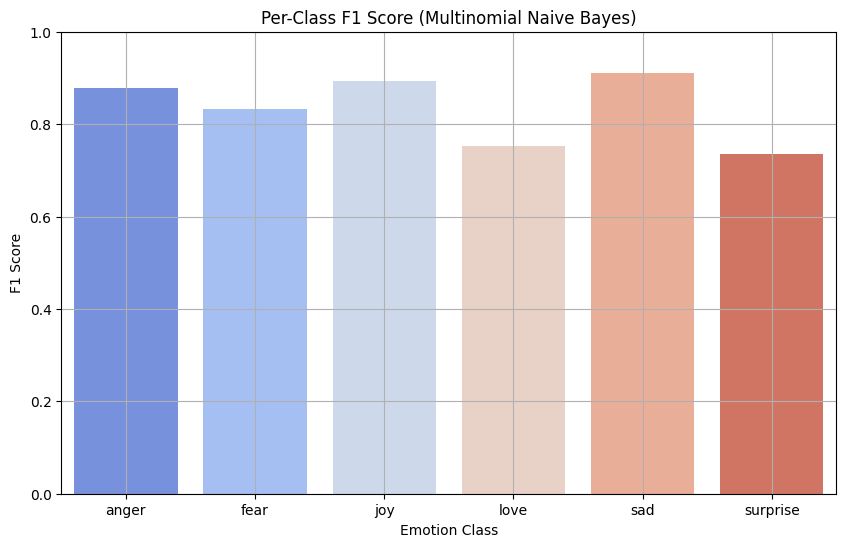

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred_mnb, output_dict=True)
classes = list(report.keys())[:-3]

f1_scores = [report[cls]['f1-score'] for cls in classes]

plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=f1_scores, palette='coolwarm')
plt.title('Per-Class F1 Score (Multinomial Naive Bayes)')
plt.ylabel('F1 Score')
plt.xlabel('Emotion Class')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

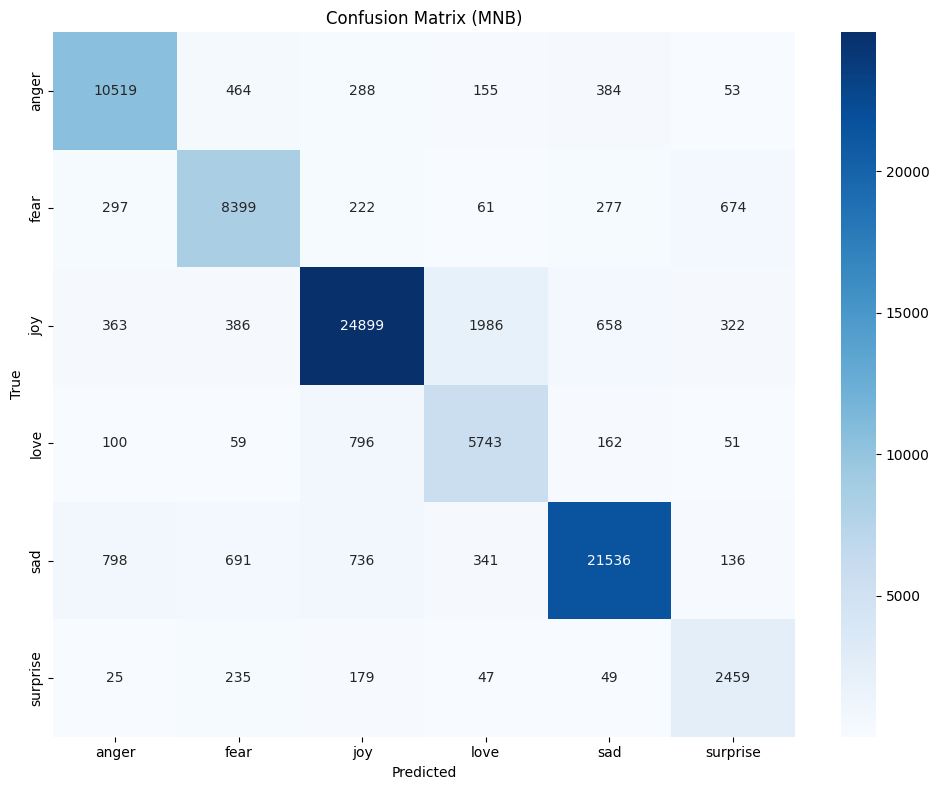

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_mnb,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=mnb_model.classes_,
    yticklabels=mnb_model.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (MNB)')
plt.tight_layout()
plt.show()

In [56]:
# misclassified rows ko identify krenge
misclassified_indices = y_test[y_pred_mnb != y_test].index

# true vs predicted nikalenge
true_labels = y_test.loc[misclassified_indices]
predicted_labels = y_pred_mnb[y_pred_mnb != y_test]

# DataFrame banainge
misclassified_df = pd.DataFrame({
    'Text': df.loc[misclassified_indices, 'text'],
    'True Label': true_labels.values,
    'Predicted Label': predicted_labels
})

# error samples show krenge
display(misclassified_df.sample(10, random_state=42))

,Text,True Label,Predicted Label
138829,i am trying to to be philosophical about all t...,sad,anger
369682,i can only take your actions as what they are ...,joy,love
331184,i feel after a day of tangling with words is t...,sad,love
60519,im left with the feeling that most rape victim...,joy,anger
145522,i finally towards the later parts in training ...,love,joy
318226,i feel a resolved that i will stand against fo...,joy,fear
261142,im feeling generous tonight so i think im abou...,joy,love
385992,i love having the blog but it feels strange to...,fear,surprise
196021,i feel rly confident abt life,joy,fear
76983,i can only imagine what is must feel like for ...,sad,love


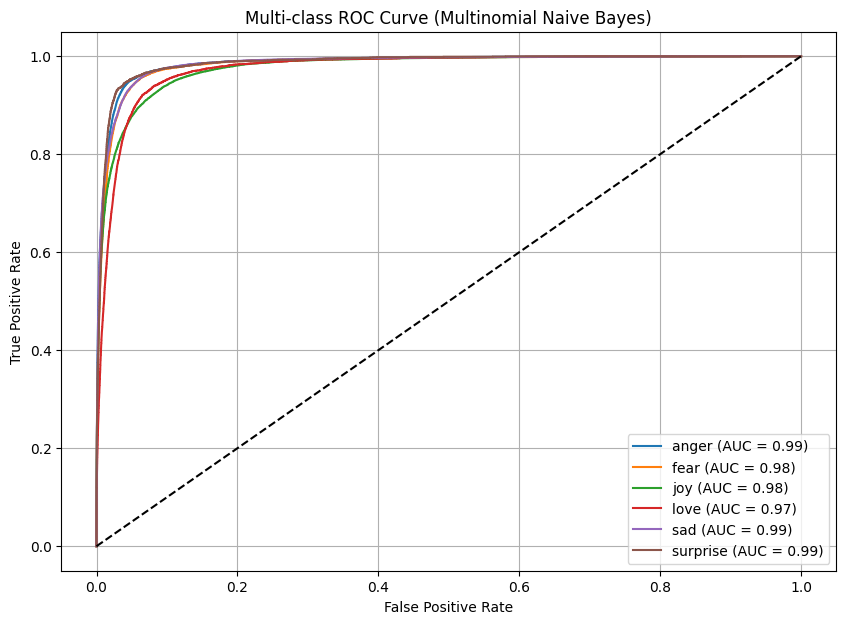

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

emotion_classes = mnb_model.classes_
y_test_bin = label_binarize(y_test, classes=emotion_classes)
n_classes = y_test_bin.shape[1]

y_score_mnb = mnb_model.predict_proba(x_test)

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_mnb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{emotion_classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multi-class ROC Curve (Multinomial Naive Bayes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

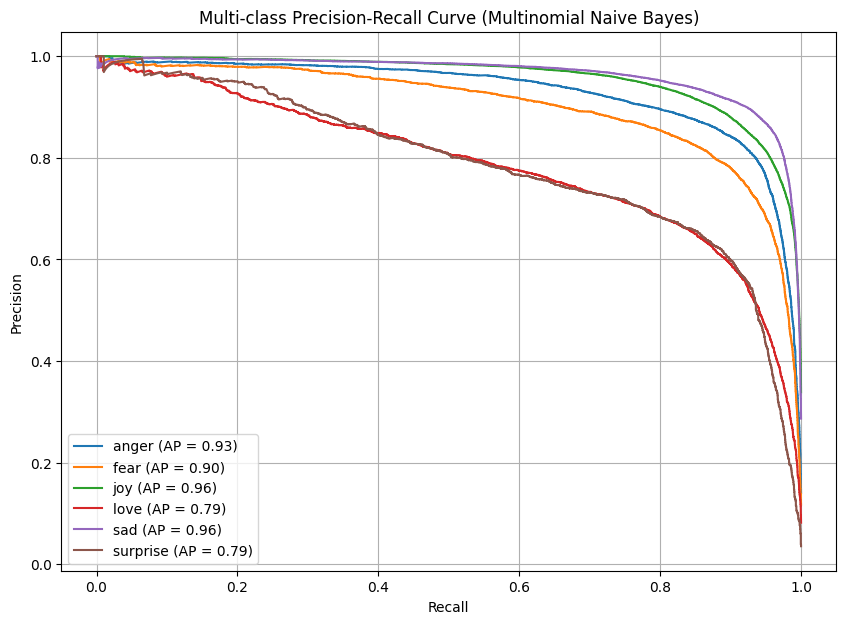

In [58]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_mnb[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score_mnb[:, i])
    plt.plot(recall, precision, label=f"{emotion_classes[i]} (AP = {ap:.2f})")

plt.title("Multi-class Precision-Recall Curve (Multinomial Naive Bayes)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [59]:
def predict_emotion_mnb(text, model, vectorizer):
    """
    function jo diye gaye text ki emotion predict karta hai, Multinomial Naive Bayes model aur TF-IDF vectorizer ka istmaal kar ke.

    Args:
        text (str): Woh input text jiski emotion predict krni hai.
        model: Trained Multinomial Naive Bayes model.
        vectorizer: Fitted TfidfVectorizer.

    Returns:
        ek tuple return krta hai jo predicted emotion rakhta hai aur probabilities ki ek dictionary.
    """
    cleaned_text = clean_text(text)
    tokens = tokenizer_stopwordremover(cleaned_text)
    lemmatized_tokens = lemmatize_tokens(tokens)
    lemmatized_text = ' '.join(lemmatized_tokens)

    X_new = vectorizer.transform([lemmatized_text])

    prediction = model.predict(X_new)[0]
    probabilities = model.predict_proba(X_new)[0]
    prob_dict = {emotion: prob for emotion, prob in zip(model.classes_, probabilities)}

    return prediction, prob_dict

In [60]:
example_text = [
    "I am so happy today!",
    "I feel really sad and depressed",
    "That movie was terrifying",
    "I love spending time with my family",
    "I'm so angry I could scream",
    "Wow, I didn't expect that at all!"]

print("\nTesting with example text:")
for text in example_text:
    prediction, probabilities = predict_emotion_mnb(text, mnb_model, tfidf_vectorizer)
    print(f"\ntext: {text}")
    print(f"Predicted emotion: {prediction}")
    print("Probabilities:")
    for emotion, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
        print(f"  {emotion}: {prob:.4f}")


Testing with example text:

text: I am so happy today!
Predicted emotion: joy
Probabilities:
  joy: 0.3542
  anger: 0.1617
  love: 0.1464
  surprise: 0.1390
  sad: 0.1272
  fear: 0.0716

text: I feel really sad and depressed
Predicted emotion: sad
Probabilities:
  sad: 0.6932
  anger: 0.1451
  fear: 0.0907
  surprise: 0.0377
  joy: 0.0226
  love: 0.0107

text: That movie was terrifying
Predicted emotion: surprise
Probabilities:
  surprise: 0.2257
  love: 0.2169
  joy: 0.1516
  sad: 0.1513
  anger: 0.1495
  fear: 0.1050

text: I love spending time with my family
Predicted emotion: love
Probabilities:
  love: 0.3204
  joy: 0.2069
  sad: 0.1785
  anger: 0.1167
  fear: 0.0918
  surprise: 0.0857

text: I'm so angry I could scream
Predicted emotion: anger
Probabilities:
  anger: 0.5998
  sad: 0.1454
  fear: 0.1244
  surprise: 0.0476
  love: 0.0444
  joy: 0.0385

text: Wow, I didn't expect that at all!
Predicted emotion: surprise
Probabilities:
  surprise: 0.3112
  fear: 0.1833
  sad: 0.1577

In [61]:
# trained logistic regression model aur TF-IDF vectorizer save krenge deployment k liye

import joblib

joblib.dump(lr_model, 'emotion_model.pkl')

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [62]:
import sklearn
import pandas
import numpy
import nltk
import joblib

print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Pandas version: {pandas.__version__}")
print(f"Numpy version: {numpy.__version__}")
print(f"NLTK version: {nltk.__version__}")
print(f"Joblib version: {joblib.__version__}")

Scikit-learn version: 1.6.1
Pandas version: 2.2.2
Numpy version: 2.0.2
NLTK version: 3.9.1
Joblib version: 1.5.2
